# Checking stability of the model versus time

One of the problems of the current framework is the fact that hard coded tests are not able to handle cases when the number of acquired statistics is limited i.e. at the low lumisection range, especially at the begining of the run. This produces too many false positives at the beginig of the run, however they do stabilize over time. 

<b>Goal</b><br>
The goal of this exercise is to evaluate if the new models handle low-statistics better.

<b>Assumption</b><br>
We don't know if the predictions are correct but the aim of this exercise is to guarantee stability, not accuracy (use the other notebook for this).

<b>Method</b><br>
We are going to plot number of alarms for collision runs and check the number of alarms generated throughtout the time (lumisections). We have a datapoint every 10 lumisections. We also plot emerging problems as we want to ensure that the scoring fluctations are not suspicious.

In [1]:
#Define those yourself if you want to use your own data

#data_directory = "/eos/cms/store/cmst3/group/dehep/adpol/dt/data"

data_directory = "../data"

In [2]:
import matplotlib
import matplotlib.pyplot as plt

# Change presentation settings

%matplotlib inline

matplotlib.rcParams["figure.figsize"] = (8.0, 5.0)
matplotlib.rcParams["xtick.labelsize"] = 12
matplotlib.rcParams["ytick.labelsize"] = 12
matplotlib.rcParams["axes.spines.left"] = True
matplotlib.rcParams["axes.spines.bottom"] = True
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["axes.labelsize"] = 14
matplotlib.rcParams["legend.fontsize"] = 14
matplotlib.rcParams["axes.titlesize"] = 14

color_palette = {"Indigo": {
                    50: "#E8EAF6",
                    100: "#C5CAE9",
                    200: "#9FA8DA",
                    300: "#7986CB",
                    400: "#5C6BC0",
                    500: "#3F51B5",
                    600: "#3949AB",
                    700: "#303F9F",
                    800: "#283593",
                    900: "#1A237E"},
                 "Teal": {      
                    50: "#E0F2F1",
                    100: "#B2DFDB",
                    200: "#80CBC4",
                    300: "#4DB6AC",
                    400: "#26A69A",
                    500: "#009688",
                    600: "#00897B",
                    700: "#00796B",
                    800: "#00695C",
                    900: "#004D40"}
                }

line_styles = [(0, ()), (0, (1, 3)), (0, (3, 2))]

In [3]:
total_no_layers = 2721
total_no_chambers = 250

### Let's check the stability:

In [4]:
# Had to be generated before loading in the notebook because ROOT/Notebook import issues

import pandas as pd

runs = [306777, 306793, 306794]

drift_tubes_alarms = pd.DataFrame()

for run in runs:
    path = "%s/%sST.csv" % (data_directory, run)
    drift_tubes_alarms = drift_tubes_alarms.append(pd.read_csv(path),
                                                   ignore_index=True);

For <i>lumi = 0</i> the model returns negative result, while current dqm a positive. Let's add this information since we don't have it in dataframe now.

In [5]:
for run in runs:
    df_zero = pd.DataFrame({"lumi": [0],
                            "current_dqm": [total_no_chambers],
                            "total": [0],
                            "emerging": [0],
                            "run": run})
    drift_tubes_alarms = pd.concat([df_zero, drift_tubes_alarms],
                                   ignore_index=True)

Change absolute number to fraction of faults reported w.r.t. all data points. This helps comparing current vs. proposed

In [6]:
drift_tubes_alarms["total"] = drift_tubes_alarms["total"] / total_no_layers
drift_tubes_alarms["emerging"] = drift_tubes_alarms["emerging"] / total_no_layers
drift_tubes_alarms["current_dqm"] = drift_tubes_alarms["current_dqm"] / total_no_chambers

Finally, plot the stability of the results

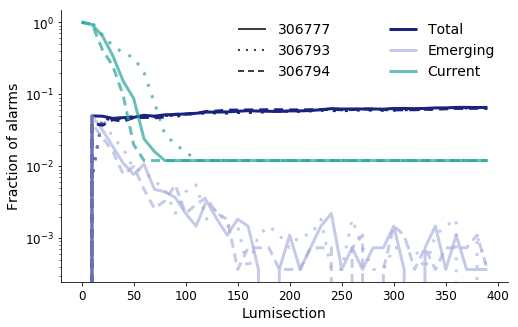

In [7]:
import matplotlib.lines as mlines

fig, ax = plt.subplots()

for i, (run, line_type) in enumerate(zip(runs, line_styles)):
    df = drift_tubes_alarms[drift_tubes_alarms.run == run].sort_values("lumi",
                                                                       ascending=1)

    plt.plot(df["lumi"],
             df["total"],
             linestyle=line_type,
             color=color_palette["Indigo"][900],
             linewidth=3.0,
             alpha=1,
             label="Total" if i == 0 else "")

    plt.plot(df["lumi"],
             df["emerging"],
             linestyle=line_type,
             color=color_palette["Indigo"][200],
             linewidth=3.0,
             alpha=0.6,
             label="Emerging" if i == 0 else "")

    plt.plot(df["lumi"],
             df["current_dqm"],
             linestyle=line_type,
             color=color_palette["Teal"][400],
             linewidth=3.0,
             alpha=0.7,
             label="Current" if i == 0 else "")

plt.xlabel("Lumisection")
plt.ylabel("Fraction of alarms")

plt.yscale("log")

legend_helper =[]
for i in range(len(runs)):
    legend_helper.append(mlines.Line2D([],
                                       [],
                                       linestyle=line_styles[i],
                                       color="black",
                                       label=runs[i]))

legend_runs = plt.legend(handles=legend_helper, frameon=False, loc=9)

plt.legend(frameon=False)

plt.gca().add_artist(legend_runs)

plt.show()

The graph shows that CNN produces stable results with not many emerging alarms.

<b>Recommedations</b><br>
To reduce the amount of emerging alarms after <i>lumi = 10</i> one would have to label more samples integrated over low statistics.